In [1]:
import numpy as np
import pandas as pd
import os.path
import cv2
import matplotlib.pyplot as plt

# Custom modules
from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import gbvoid_dataset as gbvoid
from modules import void_parameter as void_parameter

In [3]:
inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009', '6_010']

#inputs= ['1_001']

for name in inputs:
    print(name)
    lattice = 'bcc'
    # lattice = raw_input("\n\nCrystal Structure\nIndicate crystal structure.\nType one of the options fcc/bcc/hcp as shown: ")

    ### get current directory
    pa_current = os.getcwd()
    pa_parent = os.path.dirname(pa_current)

    # define paths for convenience
    pa_pic = pa_current + '/pyinputs/' + name + '.jpg'
    pa_txt = pa_current + '/pyinputs/' + name + '.txt'
    pa_selected = pa_current + '/saboutputs/' + name + '/' + 'selected.txt'

    ### Read data from text file
    gbdata = np.genfromtxt(pa_txt)
    selected_data = np.genfromtxt(pa_selected)
    width = np.amax(gbdata[:, 17])
    height = np.amax(gbdata[:, 18])
    
    ### Starting points
    staptsx = gbdata[:, 15]
    staptsy = gbdata[:, 16]
    #### Ending points
    endptsx = gbdata[:, 17]
    endptsy = gbdata[:, 18]
    mis_angle = gbdata[:,6]
    # Find dimensions for picture
    width = np.amax(gbdata[:, 17])
    height = np.amax(gbdata[:, 18]) 
        
    # define maximum void area as a multiple of average grain size (last number is factor of multiplication)
    maxarea = width * height / np.amax(gbdata[:, 20]) * 2.5

    ### run voiddetect module and return centers and radii of detected voids
    centers, radii, vheight, voidimage, drawing = vd.findvoid(pa_pic, name, maxarea)

    ### Select boundaries in void vicinity
    selected = sel.selgb(gbdata, centers, radii)
    print('From Selected function:')
    print(selected_data)
    print('----------')
    print('From Selected txt:')
    print(selected)
    
    break
    

1_001
From Selected function:
[ 305.  341.  356.  431. 2017. 2473. 2534. 2576. 2647. 2649. 2653. 2856.
 3292. 3296. 3297. 3345. 3468. 3482. 3505. 3506. 3607. 3696.]
----------
From Selected txt:
[2514, 2572, 2573, 2583, 2598, 3236, 3237]


In [2]:
inputs= ['1_001']

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'Misorientation Angle','Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain',
         'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain',
         'Lenght','Trace', 'X start', 'Y start', 'X end','Y end','ID Right Grain', 'ID Left Grain', 'Void Parameter']

columns_drop=['ID Right Grain','ID Left Grain']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
    
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

# Drop ID grain form the dataset
#void_dataset=void_dataset.drop(columns_drop, axis=1)

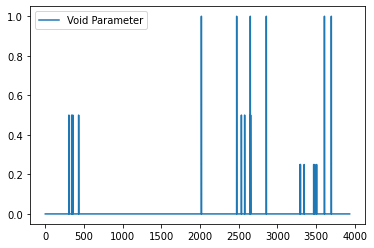

In [4]:

void_dataset.plot(y=['Void Parameter'])
plt.show()

In [5]:
selected_void_dataset=void_dataset.loc[void_dataset['Void Parameter'] != 0.0]
selected_novoid_dataset=void_dataset.loc[void_dataset['Void Parameter'] == 0.0]

# Drop Void feature form the selected dataset
#selected_void_dataset=selected_void_dataset.drop(['Void'], axis=1)
#selected_novoid_dataset=selected_novoid_dataset.drop(['Void'], axis=1)


In [6]:
selected_void_dataset

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,...,Mis. Z in Left Hand Grain,Lenght,Trace,X start,Y start,X end,Y end,ID Right Grain,ID Left Grain,Void Parameter
305,2.403,0.369,4.287,0.078,0.473,5.957,54.94,-21.0,8.0,16.0,...,16.0,18.583,23.8,37.0,643.75,54.0,636.24,2129.0,1721.0,0.50
341,5.850,0.894,0.879,0.078,0.473,5.957,53.08,-2.0,-12.0,-17.0,...,-17.0,8.327,136.1,46.0,622.38,52.0,628.16,1376.0,1721.0,0.50
356,0.078,0.473,5.957,5.587,0.991,0.932,54.49,-9.0,19.0,-18.0,...,-18.0,8.327,103.9,52.0,628.16,54.0,636.24,1721.0,1964.0,0.50
431,5.850,0.894,0.879,2.403,0.369,4.287,49.55,19.0,17.0,-15.0,...,-15.0,11.719,159.8,72.0,646.63,83.0,650.67,1376.0,2129.0,0.50
2017,2.275,0.254,3.992,5.511,0.911,0.961,55.19,-7.0,-11.0,-12.0,...,-12.0,28.095,175.3,474.0,767.88,502.0,770.19,2354.0,2432.0,1.00
2473,0.393,0.594,6.257,0.442,0.692,5.906,18.75,-7.0,-4.0,24.0,...,24.0,27.495,169.1,606.0,503.45,633.0,508.65,1051.0,1028.0,1.00
2534,2.489,0.837,4.275,3.720,0.773,2.803,52.71,-5.0,-21.0,17.0,...,17.0,31.896,13.6,623.0,865.45,654.0,857.94,2541.0,2504.0,0.50
2576,3.409,0.513,3.053,3.720,0.773,2.803,18.18,17.0,19.0,0.0,...,0.0,26.153,143.4,642.0,823.30,663.0,838.89,2474.0,2504.0,0.50
2647,3.720,0.773,2.803,6.091,0.243,0.266,40.25,26.0,-13.0,-1.0,...,-1.0,12.490,76.1,660.0,851.01,663.0,838.89,2504.0,2512.0,0.50
2649,3.979,0.518,2.804,5.292,0.431,0.394,38.51,-16.0,13.0,-13.0,...,-13.0,23.065,175.7,661.0,453.22,684.0,454.95,851.0,751.0,1.00


In [ ]:
selected_void_dataset['Mid point'] = (df_obj['Marks'] / df_obj['Total']) * 100

In [ ]:
centers, radii, vheight, voidimage, drawing = vd.findvoid(pa_pic, name, maxarea)
selected = sel.selgb(gbdata, centers, radii)

In [8]:
dicc={12:1, 11:0}

dicc[12]

1